## Street networks using OSMnx

#### Emily Roach & Anup Tapase, CP 290

In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import math
import string

## Downloading road networks for each city and saving as graphml files

In [2]:
Barcelona = ox.graph_from_place('Barcelona, Spain', network_type='drive')
ox.save_graphml(Barcelona, filename='Barcelona.graphml')

In [ ]:
# NOT WOKRING.

#place = {'administrative': 'Beijing',
#         'state': 'Beijing',
#         'country': 'PRC'}

#Beijing = ox.graph_from_place('Beijing, China', network_type='drive')
#ox.save_graphml(Beijing, filename='Beijing.graphml')

In [2]:
place = {'administrative': 'Berlin',
         'state': 'Berlin',
         'country': 'Germany'}

Berlin = ox.graph_from_place(place, network_type='drive')
ox.save_graphml(Berlin, filename='Berlin.graphml')

In [3]:
Chicago = ox.graph_from_place('Chicago, Illinois, USA', network_type='drive')
ox.save_graphml(Chicago, filename='Chicago.graphml')

In [3]:
place = {'administrative': 'Freetown',
         'country': 'Sierra Leone'}

Freetown = ox.graph_from_place(place, network_type='drive')
ox.save_graphml(Freetown, filename='Freetown.graphml')

In [ ]:
HongKong= ox.graph_from_place('HongKong', network_type='drive')
ox.save_graphml(HongKong, filename='HongKong.graphml')

In [4]:
London = ox.graph_from_place('London, United Kingdom', network_type='drive')
ox.save_graphml(London, filename='London.graphml')

In [5]:
Madrid = ox.graph_from_place('Madrid, Spain', network_type='drive')
ox.save_graphml(Madrid, filename='Madrid.graphml')

In [ ]:
# RAN FOR ALMOST AN HOUR AND DID NOT COMPLETE.

#place = {'administrative': 'Mexico City',
#        'country': 'Mexico'}

#MexicoCity = ox.graph_from_place(place, network_type='drive')
#ox.save_graphml(MexicoCity, filename='MexicoCity.graphml')

In [6]:
Moscow = ox.graph_from_place('Moscow, Russia', network_type='drive')
ox.save_graphml(Moscow, filename='Moscow.graphml')

In [7]:
NewYork = ox.graph_from_place('New York City, New York, USA', network_type='drive')
ox.save_graphml(NewYork, filename='NewYork.graphml')

In [8]:
Osaka = ox.graph_from_place('Osaka, Japan', network_type='drive')
ox.save_graphml(Osaka, filename='Osaka.graphml')

In [9]:
Paris = ox.graph_from_place('Paris, France', network_type='drive')
ox.save_graphml(Paris, filename='Paris.graphml')

In [10]:
Seoul = ox.graph_from_place('Seoul, South Korea', network_type='drive')
ox.save_graphml(Seoul, filename='Seoul.graphml')

In [ ]:
# not working

#place = {'administrative': 'Shanghai',
#         'country': 'PRC'}

#Shanghai = ox.graph_from_place(place, network_type='drive')

#ox.save_graphml(Shanghai, filename='Shanghai.graphml')

In [ ]:
#RAN FOR ALMOST AN HOUR AND DID NOT COMPLETE.

#Tokyo = ox.graph_from_place('Tokyo, Japan', network_type='drive')
#ox.save_graphml(Tokyo, filename='Tokyo.graphml')

## Loop... (need to update cities list according to adjustments above)

In [ ]:
#cities = ['Barcelona, Spain']
#cities = ['Barcelona, Spain','Beijing, China', 'Berlin, Germany', 'Chicago, Illinois, USA', 'Freetown, Sierra Leone',
#          'Hong Kong', 'London, United Kingdom', 'Madrid, Spain', 'Mexico City, Mexico', 'Moscow, Russia', 'New York, New York',
#          'Osaka, Japan', 'Paris, France', 'Seoul, South Korea', 'Shanghai, China', 'Tokyo, Japan']

In [ ]:
# create the street network within the city borders
#G = []

#for i in cities:
#    print i
#    network = ox.graph_from_place(i, network_type='drive')
#    G.append(network)

## Visualize networks

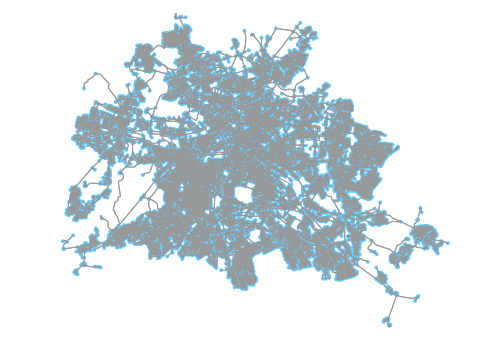

In [3]:
Berlin_projected = ox.project_graph(Berlin)
fig, ax = ox.plot_graph(Berlin_projected)

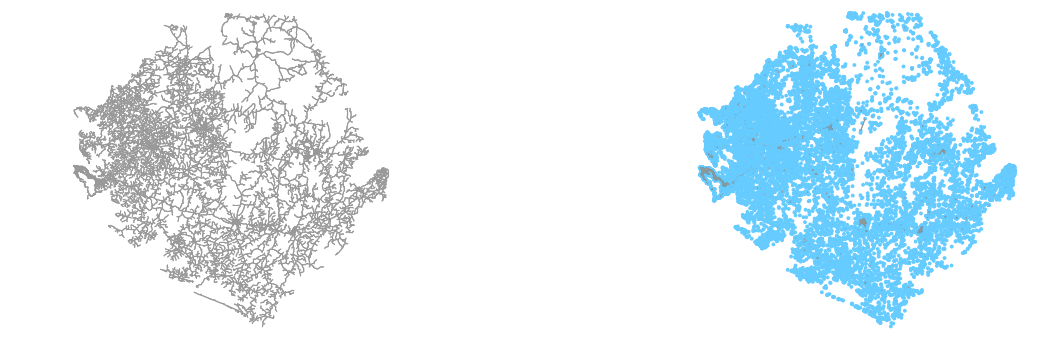

In [4]:
Freetown_projected = ox.project_graph(Freetown)
fig, ax = ox.plot_graph(Freetown_projected)

In [4]:
stats = ox.basic_stats(Berlin)

In [5]:
stats

{'circuity_avg': 1.0413787292820145,
 'count_intersections': 24316,
 'edge_density_km': None,
 'edge_length_avg': 147.2532216897338,
 'edge_length_total': 10648469.47327141,
 'intersection_density_km': None,
 'k_avg': 5.240904478909987,
 'm': 72314,
 'n': 27596,
 'node_density_km': None,
 'self_loop_proportion': 0.002295544431230467,
 'street_density_km': None,
 'street_length_avg': 146.61095824453898,
 'street_length_total': 6122180.394375458,
 'street_segments_count': 41758,
 'streets_per_node_avg': 3.0270691404551386,
 'streets_per_node_counts': {0: 0,
  1: 3280,
  2: 234,
  3: 16671,
  4: 7287,
  5: 118,
  6: 6},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.11885780547905493,
  2: 0.0084794897811277,
  3: 0.6041092912016234,
  4: 0.2640600086969126,
  5: 0.004275982026380635,
  6: 0.00021742281490071024}}

## Reading networks from saved data

In [ ]:
def fromMulti_to_Single(G):
    H = nx.Graph()
    for u,v,d in G.edges(data=True):
        H.add_edge(u,v)
    return H

In [ ]:
# Full list of cities:
#cities = ['Barcelona', 'Beijing', 'Berlin', 'Chicago', 'Freetown', 'HongKong' , 'London', 'Madrid',/
#          'Mexico', 'Moscow', 'NewYork', 'Osaka', 'Paris', 'Seoul', 'Shanghai', 'Tokyo']

g = nx.Graph()
fnames=[]
node_num=[]
path='/data/*.graphml'

# Pulling in only cities for which we were able to download networks
cities = ['Barcelona', 'Berlin', 'Chicago', 'HongKong' , 'London', 'Madrid', 'Moscow',\
          'NewYork', 'Osaka', 'Paris', 'Seoul']

for city in cities:
    file_path = r'data/'+city+'.graphml'         # change the file path based on where graphml files are saved
    G_directed = nx.read_graphml(file_path)      # reading in graphml files
    fnames.append(city)
    print city
    G = G_directed.to_undirected()               # coverting to undirected networks
    G = max(nx.connected_component_subgraphs(G), key=len)
    node_num.append(G.number_of_nodes())    


In [ ]:
node_num

In [ ]:
I=np.argsort(node_num)

## Read in sorted order and calculate avg C and avg Shortest Path Length 

In [ ]:
## This code will take at least 20-30 hours to run for all cities.
## Leaving the two biggest cities out, Seoul and London, takes about 10 hours

pathlength=[]
clustering=[]
k = []
nodes_num=[]
names=[]
fnames_sorted=[]

for i in I:
    print cities[i]
    file_path = r'data/'+cities[i]+'.graphml'
    G_directed = nx.read_graphml(file_path)
    g = G_directed.to_undirected()
    G = max(nx.connected_component_subgraphs(g), key=len)
    nodes_num.append(G.number_of_nodes())
    H=fromMulti_to_Single(G)
    clustering.append(nx.average_clustering(H))
    pathlength.append(nx.average_shortest_path_length(H))
    k.append(np.mean(dict(nx.degree(H)).values()))

## Plotting graphs

In [ ]:
# Shortest path vs. Log N

plt.figure(figsize=(8,6))
plt.plot(nodes_num,np.log(nodes_num),'-r.',label='Log N')
plt.plot(nodes_num,pathlength,'-bo',label='Shortest path')
plt.legend(loc="upper left",fontsize=18)
plt.xlabel("Number of Nodes, N",fontsize=18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.show()

In [ ]:
# Clustering coefficient

plt.figure(figsize=(8,6))
plt.plot(nodes_with_london,clustering,'-ks',label='Clustering Coefficient')
plt.legend(loc="upper left",fontsize=18)
plt.xlabel("Number of Nodes, N",fontsize=18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.show()

In [ ]:
# Clustering coefficient comparison with random graph

plt.figure(figsize=(8,6))
plt.plot(nodes_num,clustering[0:-1],'--ks',label='Clus Coef Street Networks')
plt.plot(nodes_num,clusteringRG,'--bs',label='Clus Coef Random Graph with same k')
plt.plot(nodes_num,np.squeeze(k) / np.squeeze(nodes_num),'-r',label='<k>/N')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35),fontsize=18)
plt.xlabel("Number of Nodes, N",fontsize=18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.show()